In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc, accuracy_score,  classification_report, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.calibration import calibration_curve

In [2]:
df_native = pd.DataFrame(pd.read_excel("/mnt/hdd/Masterarbeit/2.Versuch/Native_Data/SISSIz_Excel/native.xlsx"))
df_sissiz_mono = pd.DataFrame(pd.read_excel("/mnt/hdd/Masterarbeit/2.Versuch/Native_Data/SISSIz_Excel/sissiz_mono.xlsx"))
df_sissiz_di = pd.DataFrame(pd.read_excel("/mnt/hdd/Masterarbeit/2.Versuch/Native_Data/SISSIz_Excel/sissiz_di.xlsx"))
df_multiperm_mono = pd.DataFrame(pd.read_excel("/mnt/hdd/Masterarbeit/2.Versuch/Native_Data/SISSIz_Excel/multiperm_mono.xlsx"))
df_multiperm_di = pd.DataFrame(pd.read_excel("/mnt/hdd/Masterarbeit/2.Versuch/Native_Data/SISSIz_Excel/multiperm_di.xlsx"))
df_aln_shuffle = pd.DataFrame(pd.read_excel("/mnt/hdd/Masterarbeit/2.Versuch/Native_Data/SISSIz_Excel/alifoldz.xlsx"))

In [3]:
df_native.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.6628,0.6764,0.0098,0.9034,0.6115,-48.80,-0.34,0.83,-58.20,ar14.txt
1,0.7380,0.7471,0.0104,0.5848,0.5260,-25.37,-1.58,1.77,-13.43,ar15.txt
2,0.7865,0.7822,0.0138,1.0424,0.5280,-58.04,-20.00,4.86,-7.82,ar35.txt
3,0.8628,0.8656,0.0090,0.8936,0.5702,-58.87,-23.22,6.23,-5.72,ar45.txt
4,0.6684,0.6896,0.0123,0.8501,0.6235,-58.95,-2.27,2.15,-26.42,ar7.txt
5,0.7960,0.8145,0.0110,0.9362,0.4867,-44.76,-6.75,3.38,-11.26,ar9.txt
6,0.7753,0.7734,0.0052,-0.0000,0.5404,0.00,-0.46,1.04,0.44,HOTAIR_D1.txt
7,0.8777,0.8683,0.0132,0.2367,0.5163,-3.58,-2.54,2.13,-0.49,HOTAIR_D1_H10_compact.txt
8,0.8507,0.8444,0.0156,0.1094,0.5933,-0.98,-0.36,0.89,-0.69,HOTAIR_D1_H7_compact.txt
9,0.7737,0.7722,0.0048,0.0810,0.5442,-13.54,-10.67,4.13,-0.70,HOTAIR_D2.txt


In [4]:
df_native[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.74253,0.748683,0.009870,0.514587,0.485663,-26.917667,-8.421667,2.902000,-47.397333
std,0.08439,0.077475,0.003937,0.361593,0.077971,23.957543,13.626152,3.427284,101.469803
min,0.55910,0.586900,0.002800,-0.000000,0.350900,-62.970000,-39.800000,0.000000,-412.760000
25%,0.67910,0.696825,0.006700,0.111800,0.426450,-52.857500,-9.690000,0.592500,-23.172500
50%,0.76730,0.765950,0.009400,0.577600,0.470850,-19.395000,-0.995000,1.405000,-4.025000
75%,0.80365,0.805725,0.012250,0.835525,0.537300,-4.272500,-0.182500,3.942500,-0.995000
max,0.87770,0.868300,0.019300,1.042400,0.646800,0.000000,0.000000,10.210000,0.440000


In [5]:
df_sissiz_mono.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.6775,0.6823,0.0077,-0.0000,0.6531,0.00,-0.69,1.20,0.57,neg_sample_SISSIz_mono_ar14.txt
1,0.7392,0.7444,0.0125,-0.0000,0.4602,0.00,-1.15,1.72,0.67,neg_sample_SISSIz_mono_ar15.txt
2,0.7870,0.7796,0.0136,0.3891,0.4958,-14.38,-15.46,4.24,0.26,neg_sample_SISSIz_mono_ar35.txt
3,0.8455,0.8502,0.0063,0.5470,0.5539,-29.83,-17.36,5.16,-2.42,neg_sample_SISSIz_mono_ar45.txt
4,0.6785,0.6957,0.0107,0.0369,0.6969,-2.10,-3.33,2.56,0.48,neg_sample_SISSIz_mono_ar7.txt
5,0.8063,0.8113,0.0067,0.1727,0.4687,-6.27,-6.77,3.59,0.14,neg_sample_SISSIz_mono_ar9.txt
6,0.7720,0.7663,0.0046,-0.0000,0.5546,0.00,-0.46,1.06,0.44,neg_sample_SISSIz_mono_HOTAIR_D1.txt
7,0.8847,0.8784,0.0112,0.0968,0.5509,-1.53,-4.46,3.03,0.97,neg_sample_SISSIz_mono_HOTAIR_D1_H10_compact.txt
8,0.8723,0.8673,0.0153,-0.0000,0.6204,0.00,-0.34,0.68,0.50,neg_sample_SISSIz_mono_HOTAIR_D1_H7_compact.txt
9,0.7739,0.7686,0.0042,0.0799,0.5376,-12.64,-8.26,3.74,-1.17,neg_sample_SISSIz_mono_HOTAIR_D2.txt


In [6]:
df_sissiz_mono[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()


# Example neg_sample_SISSIz_mono_output_60_175.txt
# z-score = (RNAalifold consensus Minimum Free Energy (MFE) of the original alignment - Average consensus MFE in the sampled alignments) / Standard deviation of the consensus MFE in the sampled alignments
# z-score = (-7.27 - -9.87) / 4.02 = 0,65

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.747233,0.747850,0.008817,0.080017,0.482077,-5.743333,-6.055333,2.320000,0.226000
std,0.077673,0.073259,0.004111,0.139070,0.093586,10.086718,9.070226,2.292072,0.773432
min,0.596100,0.599700,0.002400,-0.000000,0.323900,-30.040000,-26.850000,0.000000,-2.420000
25%,0.686475,0.698325,0.005600,0.000000,0.424400,-5.470000,-7.887500,0.350000,0.000000
50%,0.759800,0.755350,0.007900,-0.000000,0.464450,0.000000,-0.850000,1.390000,0.210000
75%,0.797625,0.793850,0.011900,0.092575,0.547575,0.000000,-0.075000,3.702500,0.500000
max,0.884700,0.878400,0.019900,0.547000,0.696900,0.000000,0.000000,6.810000,2.450000


In [7]:
df_sissiz_di.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.6775,0.6876,0.0088,-0.0000,0.6351,0.00,-0.13,0.50,0.26,neg_sample_SISSIz_di_ar14.txt
1,0.7496,0.7521,0.0097,0.1545,0.5830,-4.12,-1.71,1.93,-1.25,neg_sample_SISSIz_di_ar15.txt
2,0.7751,0.7737,0.0122,0.3970,0.5350,-17.00,-18.94,4.65,0.42,neg_sample_SISSIz_di_ar35.txt
3,0.7226,0.7257,0.0107,-0.0000,0.3329,0.00,-0.17,0.64,0.26,neg_sample_SISSIz_di_S7RNA.txt
4,0.8125,0.8099,0.0101,0.0599,0.4283,-1.39,-2.07,1.52,0.45,neg_sample_SISSIz_di_S8RNA.txt
5,0.6090,0.6342,0.0137,-0.0000,0.4335,0.00,0.00,0.00,0.00,neg_sample_SISSIz_di_updated_Arisong.txt
6,0.8024,0.8065,0.0067,0.4309,0.4395,-50.22,-35.24,9.59,-1.56,neg_sample_SISSIz_di_XIST_A.S0.txt
7,0.8105,0.8118,0.0064,0.4165,0.4981,-50.48,-38.25,9.90,-1.23,neg_sample_SISSIz_di_XIST_A.S1.txt
8,0.8105,0.8119,0.0060,0.4165,0.4981,-50.48,-38.71,10.32,-1.14,neg_sample_SISSIz_di_XIST_A.S2.txt
9,0.8086,0.8070,0.0058,0.3073,0.4755,-35.30,-34.94,8.51,-0.04,neg_sample_SISSIz_di_XIST_A.S3.txt


In [8]:
df_sissiz_di[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.748703,0.751237,0.009100,0.125027,0.493277,-9.849667,-8.246000,2.761000,-0.133000
std,0.082197,0.078793,0.003942,0.166662,0.093685,16.619576,13.175256,3.328234,0.681166
min,0.579500,0.585400,0.002400,-0.000000,0.332900,-50.480000,-38.710000,0.000000,-1.560000
25%,0.699775,0.708700,0.006100,0.000000,0.429600,-10.170000,-7.912500,0.297500,-0.735000
50%,0.763950,0.765050,0.008900,0.022700,0.488900,-0.805000,-0.990000,1.350000,0.085000
75%,0.810025,0.809175,0.010700,0.272750,0.543700,0.000000,-0.070000,3.837500,0.312500
max,0.888100,0.880300,0.019400,0.444000,0.678800,0.000000,-0.000000,10.320000,1.260000


In [9]:
df_multiperm_mono.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.5730,0.5828,0.0059,0.0855,0.6495,-13.75,-2.33,2.30,-4.96,neg_sample_MULTIPERM_mono_RepA_Fang_Fig5.txt
1,0.5452,0.5544,0.0079,-0.0000,0.5299,0.00,0.00,0.00,0.00,neg_sample_MULTIPERM_mono_RF00167.txt
2,0.6191,0.6259,0.0154,0.0436,0.6907,-0.40,-0.00,0.01,-26.77,neg_sample_MULTIPERM_mono_RF02162.txt
3,0.5580,0.5691,0.0134,-0.0000,0.5424,0.00,0.00,0.00,0.00,neg_sample_MULTIPERM_mono_S15RNA.txt
4,0.5326,0.5466,0.0110,-0.0000,0.5517,0.00,0.00,0.00,0.00,neg_sample_MULTIPERM_mono_S1RNA.txt
5,0.6041,0.6123,0.0084,0.0017,0.5854,-0.04,0.00,0.00,0.00,neg_sample_MULTIPERM_mono_S4RNA.txt
6,0.6013,0.6168,0.0092,-0.0000,0.5057,0.00,0.00,0.00,0.00,neg_sample_MULTIPERM_mono_S7RNA.txt
7,0.6718,0.6760,0.0083,-0.0000,0.5517,0.00,-0.03,0.21,0.12,neg_sample_MULTIPERM_mono_S8RNA.txt
8,0.4923,0.5304,0.0150,-0.0000,0.6453,0.00,0.00,0.00,0.00,neg_sample_MULTIPERM_mono_updated_Arisong.txt
9,0.8016,0.8031,0.0074,0.2853,0.4483,-29.96,-10.97,4.63,-4.10,neg_sample_MULTIPERM_mono_XIST_A.S0.txt


In [10]:
df_multiperm_mono[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.658923,0.666923,0.009557,0.065613,0.598533,-6.256000,-2.542333,1.170000,-1.663000
std,0.095965,0.089590,0.003914,0.130871,0.087166,13.777135,5.208019,2.001765,5.050276
min,0.492300,0.530400,0.003200,-0.000000,0.448300,-53.420000,-17.960000,0.000000,-26.770000
25%,0.589375,0.600675,0.006475,0.000000,0.544725,-0.757500,-1.047500,0.000000,-0.742500
50%,0.648700,0.656800,0.008600,-0.000000,0.589200,0.000000,0.000000,0.000000,0.000000
75%,0.734000,0.736150,0.011750,0.044125,0.659900,0.000000,0.000000,1.540000,0.000000
max,0.801600,0.803500,0.017900,0.479000,0.737700,0.000000,0.000000,6.020000,0.390000


In [11]:
df_multiperm_di.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.5842,0.5967,0.0099,0.0877,0.7219,-3.37,0.00,0.00,0.00,neg_sample_MULTIPERM_di_ar14.txt
1,0.5976,0.6089,0.0099,0.0184,0.6892,-0.71,-0.11,0.41,-1.45,neg_sample_MULTIPERM_di_ar15.txt
2,0.6317,0.6371,0.0152,0.3506,0.6625,-17.10,-11.68,4.13,-1.31,neg_sample_MULTIPERM_di_ar35.txt
3,0.7332,0.7358,0.0083,0.2852,0.6826,-17.73,-8.35,3.57,-2.63,neg_sample_MULTIPERM_di_ar45.txt
4,0.6167,0.6321,0.0105,0.0519,0.7372,-2.90,-0.89,1.11,-1.81,neg_sample_MULTIPERM_di_ar7.txt
5,0.6942,0.7047,0.0077,0.1036,0.6139,-3.88,-2.87,2.71,-0.37,neg_sample_MULTIPERM_di_ar9.txt
6,0.7258,0.7299,0.0043,-0.0000,0.6405,0.00,-0.08,0.29,0.26,neg_sample_MULTIPERM_di_HOTAIR_D1.txt
7,0.8000,0.7947,0.0121,-0.0000,0.6024,0.00,-0.98,1.38,0.71,neg_sample_MULTIPERM_di_HOTAIR_D1_H10_compact.txt
8,0.7823,0.7771,0.0144,-0.0000,0.7028,0.00,0.00,0.00,0.00,neg_sample_MULTIPERM_di_HOTAIR_D1_H7_compact.txt
9,0.7288,0.7340,0.0050,0.0063,0.6415,-1.00,-1.31,1.50,0.20,neg_sample_MULTIPERM_di_HOTAIR_D2.txt


In [12]:
df_multiperm_di[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.656765,0.664665,0.009029,0.106406,0.601597,-8.998065,-5.659677,1.797097,-1.770000
std,0.095801,0.090039,0.003355,0.177034,0.087069,17.936701,12.034081,2.978461,4.568178
min,0.511800,0.539300,0.003100,-0.000000,0.448300,-56.150000,-37.360000,0.000000,-21.970000
25%,0.576700,0.588000,0.007000,-0.000000,0.544500,-3.625000,-2.090000,0.005000,-1.940000
50%,0.631700,0.637100,0.008300,0.002000,0.602400,-0.550000,-0.050000,0.290000,0.000000
75%,0.731000,0.734900,0.010700,0.095150,0.665200,0.000000,0.000000,2.105000,0.100000
max,0.801600,0.803900,0.015600,0.528700,0.737200,0.000000,0.000000,9.310000,0.710000


In [13]:
df_aln_shuffle.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.8038,0.8040,0.0065,0.4887,0.4483,-44.76,-28.27,7.96,-2.07,neg_sample_ALIFOLDz_XIST_A.S2.txt
1,0.8038,0.8024,0.0072,0.4342,0.4483,-40.48,-27.47,8.31,-1.57,neg_sample_ALIFOLDz_XIST_A.S3.txt
2,0.8038,0.8017,0.0066,0.4905,0.4483,-43.47,-24.18,7.04,-2.74,neg_sample_ALIFOLDz_XIST_A.S1.txt
3,0.7865,0.7845,0.0134,0.5626,0.5280,-25.96,-20.02,5.41,-1.10,neg_sample_ALIFOLDz_ar35.txt
4,0.7753,0.7716,0.0049,-0.0000,0.5404,0.00,-0.44,0.94,0.47,neg_sample_ALIFOLDz_HOTAIR_D1.txt
5,0.8777,0.8697,0.0124,0.3155,0.5163,-3.83,-2.81,2.49,-0.41,neg_sample_ALIFOLDz_HOTAIR_D1_H10_compact.txt
6,0.8507,0.8430,0.0167,0.1096,0.5933,-0.98,-0.35,0.79,-0.81,neg_sample_ALIFOLDz_HOTAIR_D1_H7_compact.txt
7,0.7737,0.7717,0.0052,0.0605,0.5442,-9.64,-11.81,4.91,0.44,neg_sample_ALIFOLDz_HOTAIR_D2.txt
8,0.7214,0.7184,0.0059,-0.0000,0.4550,0.00,-0.03,0.12,0.27,neg_sample_ALIFOLDz_HOTAIR_D3.txt
9,0.7609,0.7592,0.0044,-0.0000,0.3929,0.00,-0.03,0.18,0.18,neg_sample_ALIFOLDz_HOTAIR_D4.txt


In [14]:
df_aln_shuffle[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0000,18.000000
mean,0.765244,0.765089,0.008761,0.310878,0.500300,-21.942222,-9.057222,3.1050,-7.988333
std,0.082279,0.077739,0.004735,0.279588,0.071222,28.361765,11.373636,3.0968,28.711540
min,0.549100,0.569900,0.003000,-0.000000,0.382800,-112.910000,-28.270000,0.0000,-122.910000
25%,0.754075,0.753050,0.005375,0.060675,0.448300,-37.737500,-18.977500,0.3050,-2.357500
50%,0.782200,0.778100,0.006900,0.316100,0.509500,-12.425000,-1.650000,1.7350,-1.335000
75%,0.803800,0.802375,0.012200,0.490050,0.543250,-1.210000,-0.100000,5.7100,0.075000
max,0.877700,0.869700,0.019700,0.887000,0.646800,0.000000,0.000000,8.3100,0.470000


## Mean Pairwise Identity (MPI) of the input alignment

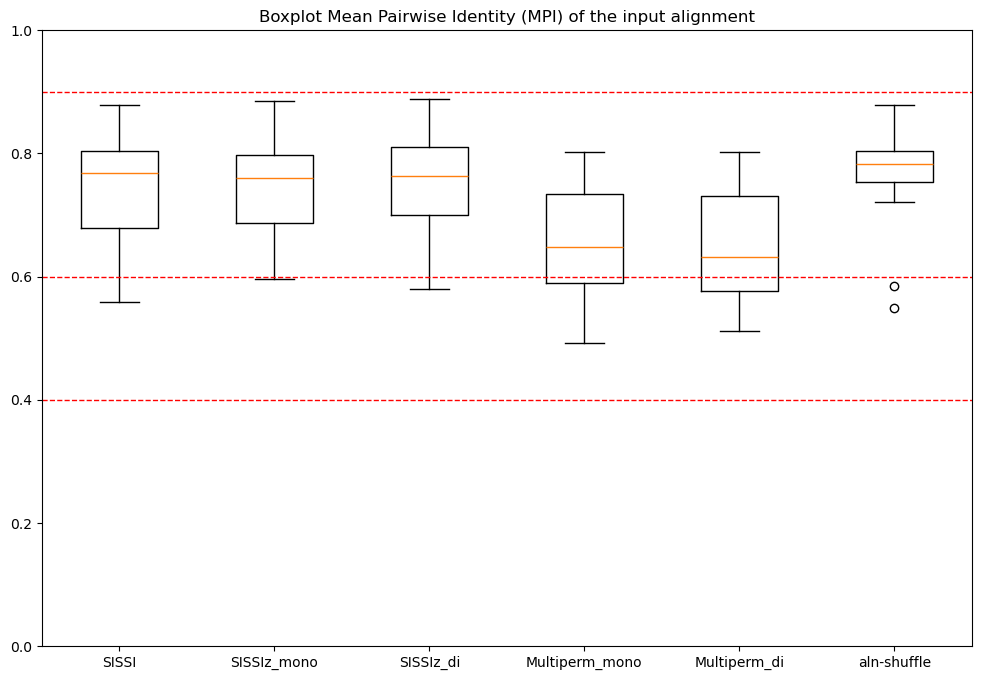

In [15]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Mean Pairwise Identity (MPI) of the input alignment'] for df in dataframes]
thresholds = [0.40, 0.60, 0.90]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.ylim(0.0, 1.0)
plt.title('Boxplot Mean Pairwise Identity (MPI) of the input alignment')
plt.show()

## Average MPI of the sampled alignments.

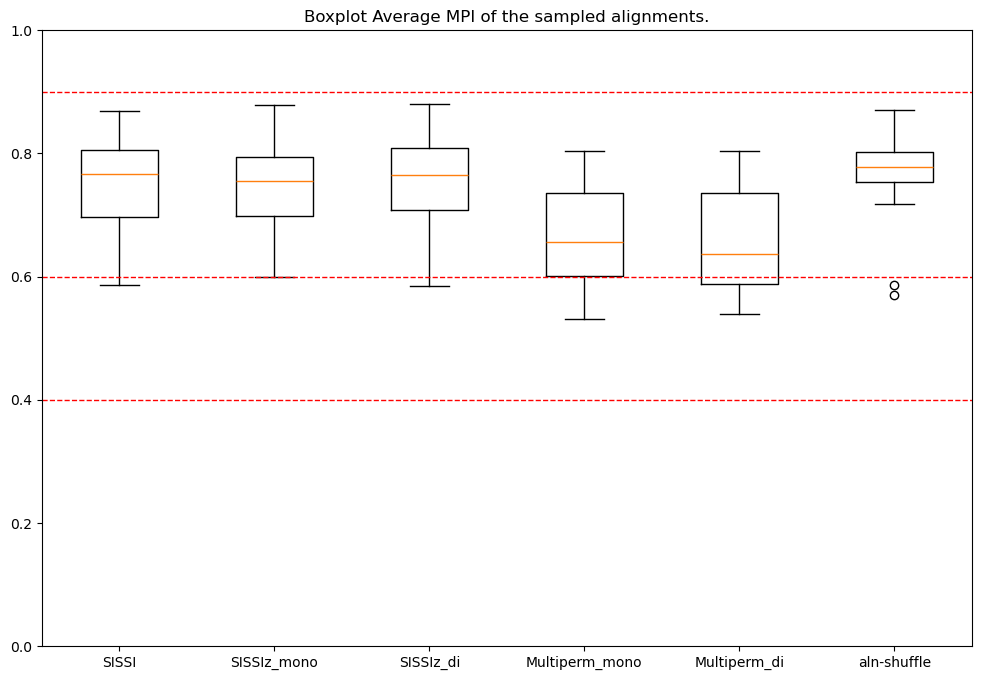

In [16]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Average MPI of the sampled alignments.'] for df in dataframes]
thresholds = [0.40, 0.60, 0.90]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.ylim(0.0, 1.0)
plt.title('Boxplot Average MPI of the sampled alignments.')
plt.show()

## Standard deviation of the MPIs of the sampled alignments

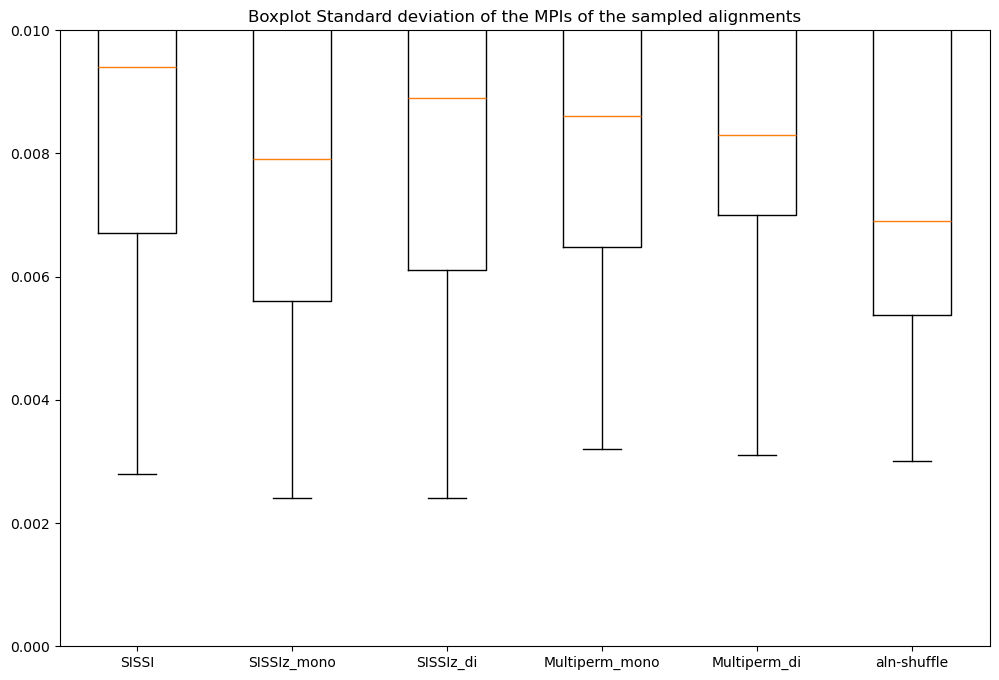

In [17]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Standard deviation of the MPIs of the sampled alignments'] for df in dataframes]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.ylim(0.0, 0.01)
plt.title('Boxplot Standard deviation of the MPIs of the sampled alignments')
plt.show()

## Structural Conservation Index (SCI)

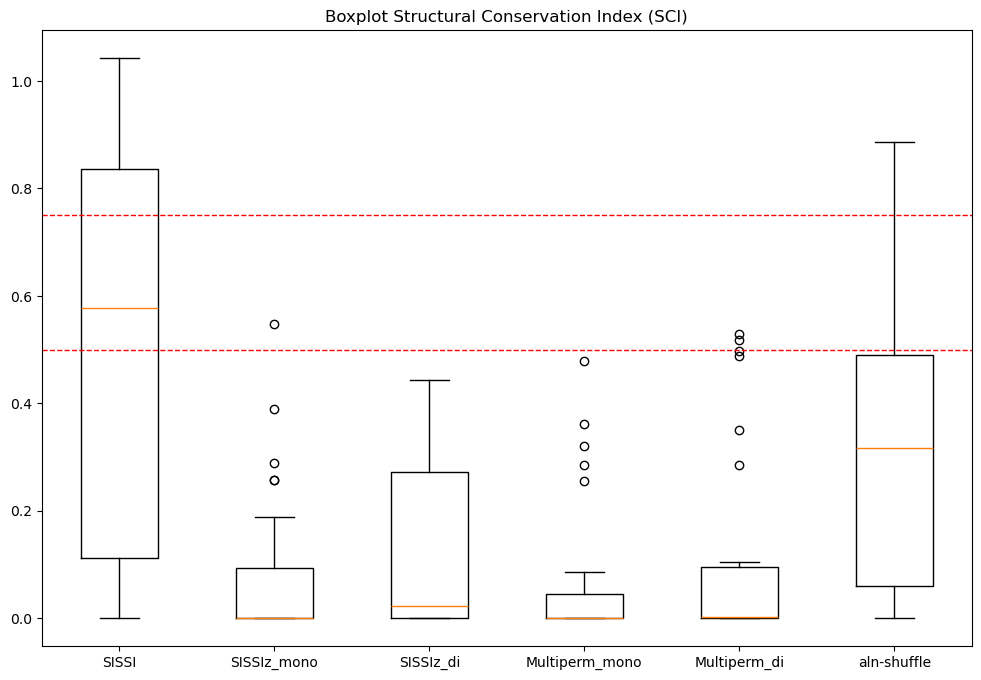

In [18]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Structural Conservation Index (SCI)'] for df in dataframes]
thresholds = [0.5, 0.75]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Structural Conservation Index (SCI)')
plt.show()

## GC-Content

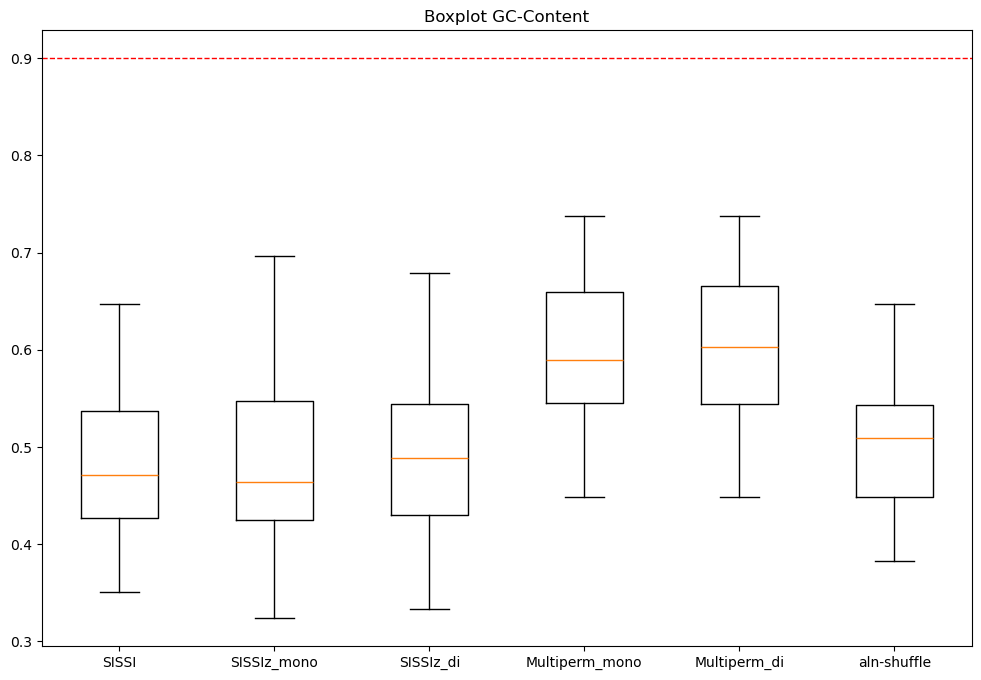

In [19]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['GC-Content'] for df in dataframes]
thresholds = [0.9]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot GC-Content')
plt.show()

## RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.

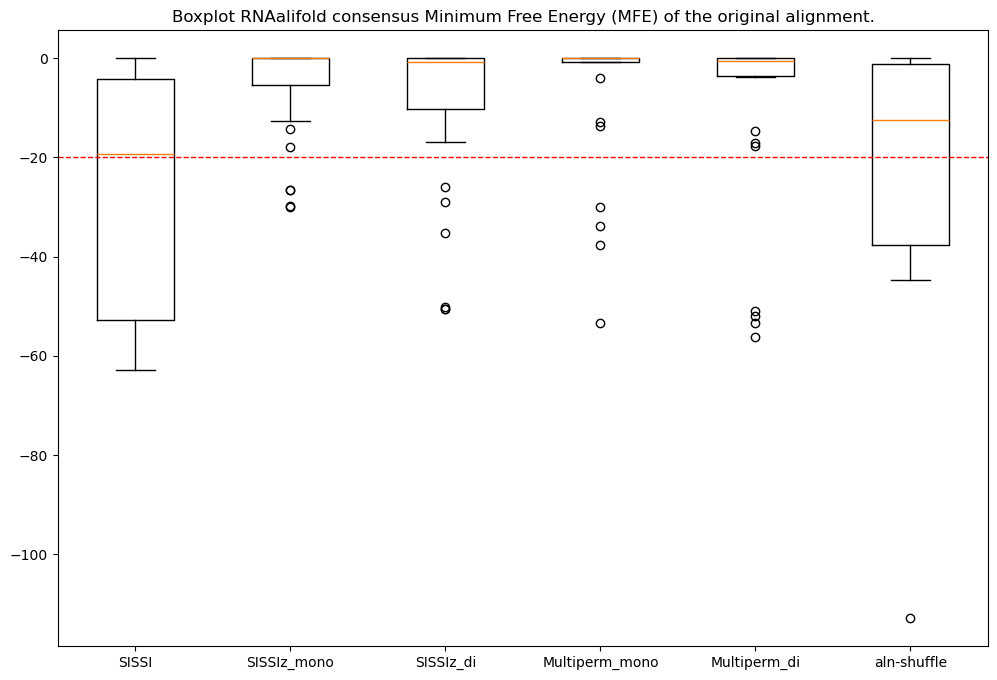

In [20]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.'] for df in dataframes]
thresholds = [-20]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.')
plt.show()

## Average consensus MFE in the sampled alignments

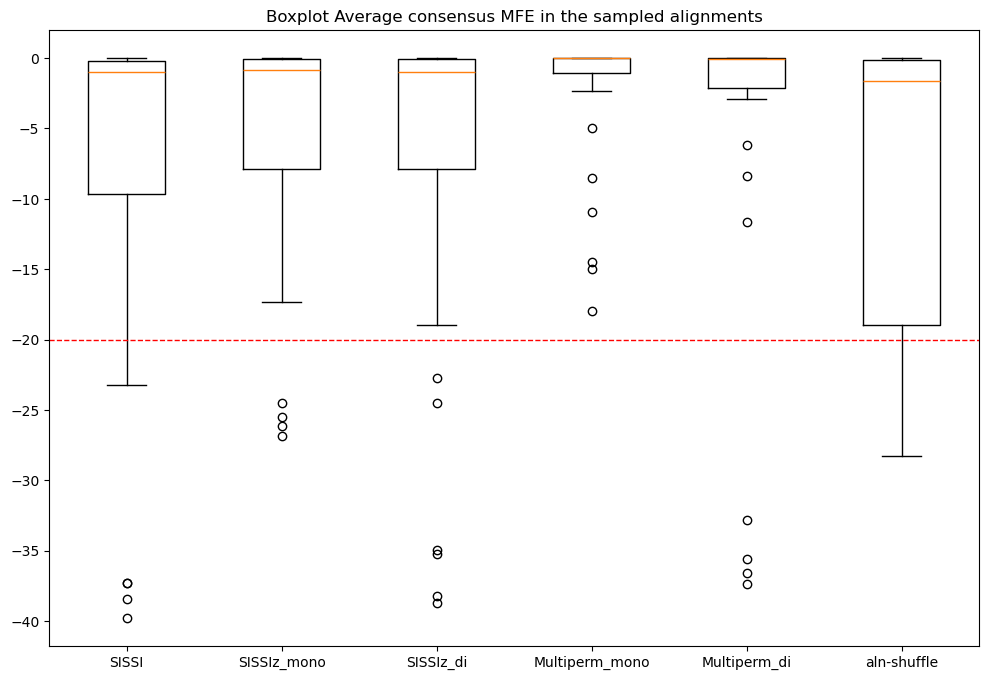

In [21]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Average consensus MFE in the sampled alignments'] for df in dataframes]
thresholds = [-20]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Average consensus MFE in the sampled alignments')
plt.show()

## Standard deviation of the consensus MFE in the sampled alignments

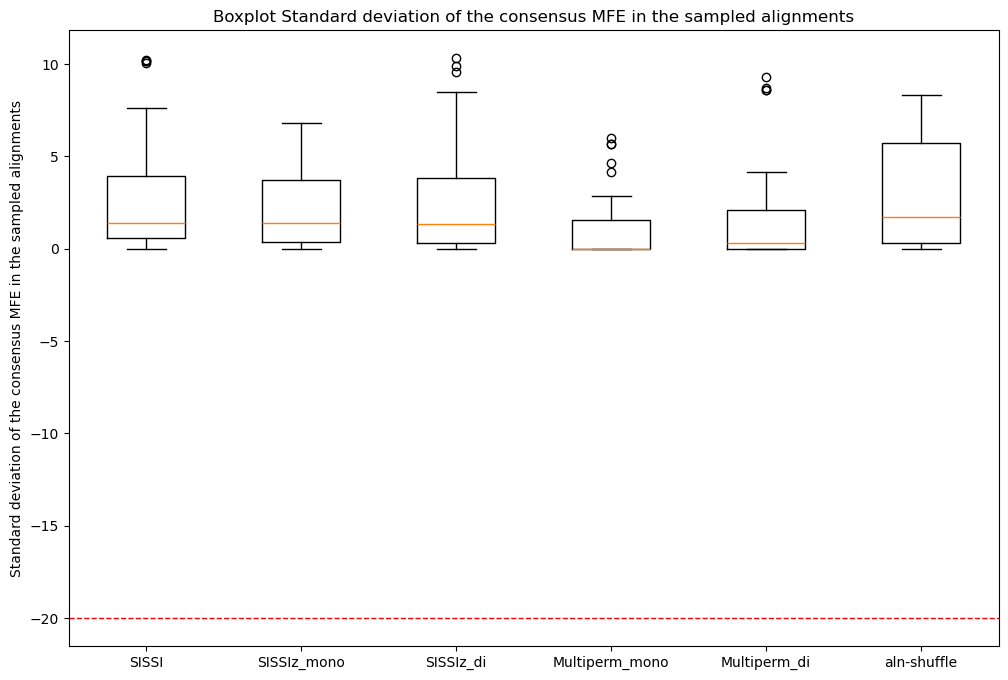

In [22]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Standard deviation of the consensus MFE in the sampled alignments'] for df in dataframes]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Standard deviation of the consensus MFE in the sampled alignments')
plt.ylabel('Standard deviation of the consensus MFE in the sampled alignments')
plt.show()

## z-score 

/tmp/ipykernel_100113/2487228010.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_100113/2487228010.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_100113/2487228010.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


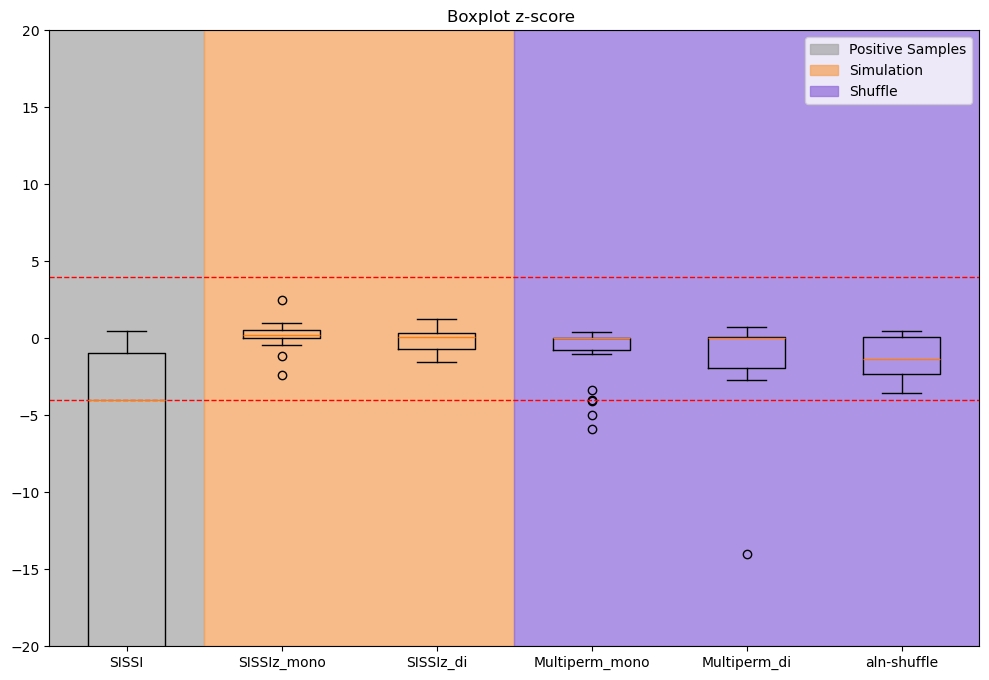

In [ ]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['z-score calculated from 7. 8. and 9.'] for df in dataframes]
thresholds = [-4, 4]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1)

plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')

plt.ylim(-4, 10)
plt.title('Boxplot z-score ')
plt.legend()
plt.show()